# Understanding Window Calculations
The following code generates an interactive plot to see what different window calculations look like.

## About the Data
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the [`stock_analysis`](https://github.com/stefmolin/stock-analysis) package).

## Interactive Visualizations
Using the widget backend requires `ipympl`, which we installed back in chapter 1. However, depending on your Jupyter setup and machine you may also need to install `node.js` and with run a few commands from the command line. Try to run the cell below, and if that doesn't work follow the installation instructions [here](https://github.com/matplotlib/jupyter-matplotlib). Be sure to restart the kernel when you are set up.

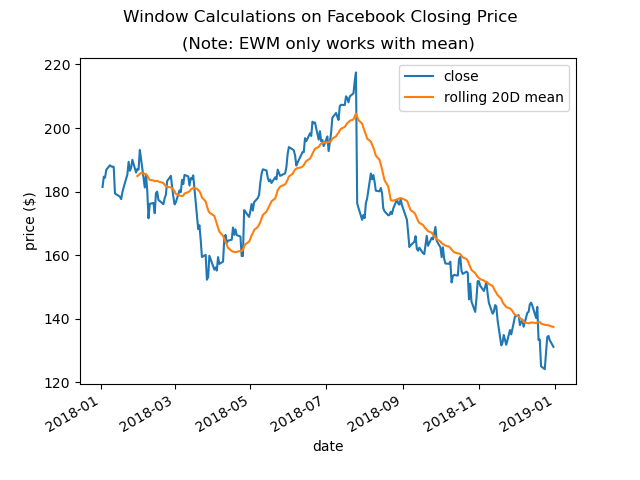

In [2]:
%matplotlib widget
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)

def window_calculations(df):
    def plot_viz(period=20, window_type='rolling', agg='mean'):
        ax = df.plot(y='close')
        window_func = getattr(df.close, window_type)
        if window_type == 'rolling':
            kwargs = {'window': period}
        elif window_type == 'expanding':
            kwargs = {'min_periods': period}
        elif window_type == 'ewm':
            kwargs = {'span': period}
            if agg != 'mean':
                print('Changing to mean')
                agg = 'mean'
        window_func(**kwargs).agg(agg).plot(ax=ax, label=f'{window_type} {period}D {agg}')

        plt.suptitle('Window Calculations on Facebook Closing Price')
        plt.title('(Note: EWM only works with mean)')
        plt.ylabel('price ($)')
        plt.legend()
    
    return plot_viz
interact(
    window_calculations(fb), 
    period=(0, 200, 5), 
    window_type=['rolling', 'expanding', 'ewm'], 
    agg=['sum', 'min', 'max', 'mean']
);

*More information on the `interact()` function can be found [here](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).*

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="./2-dataframe_operations.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="./3-aggregations.ipynb">
            <button>Next Notebook &#8594;</button>
        </a>
    </div>
</div>
<hr>